# Assignment 3 Python

#### Fellysia Devi Pramono

#### PYTN-KS06-006

#### Import Library
Diimport terlebih dahulu library yang dibutuhkan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Kemudian datanya diimport sesuai dengan lokasi data yang akan digunakan

In [2]:
CSV_FILE = 'C:\\Users\\HP\\dataset\\bank-additional.csv'
df = pd.read_csv(CSV_FILE,sep=';')

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


### Missing Values Check
Akan dicek apakah data yang digunakan memiliki missing values atau tidak

In [4]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

Karena tidak memiliki missing values, maka data ini dapat dilanjutkan tanpa harus menambahkan values

Pertama-tama yang akan dieksekusi yaitu Logistic Regression

### Logistic Regression 

Diimport library yang dibutuhkan untuk logistic regression

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import f1_score
from sklearn import metrics

Kita harus mencocokkan solver dan regularization dengan hati-hati karena beberapa alasan:

'liblinear' solver doesn’t work without regularization. 'newton-cg', 'sag', 'saga', and 'lbfgs' don’t support L1 regularization. 'saga' is the only solver that supports elastic-net regularization. Setelah model dibuat, kita perlu menyesuaikan (atau melatih) model tersebut.

In [6]:
model = LogisticRegression(solver = 'liblinear', random_state = 0)

Agar data yang digunakan tidak terlalu banyak menggunakan variabel, untuk variabel basic.9y, basic.6y, dan basic.4y akan diubah menjadi Basic dengan numpy seperti di bawah ini

In [7]:
df['education']=np.where(df['education'] =='basic.9y', 'Basic', df['education'])
df['education']=np.where(df['education'] =='basic.6y', 'Basic', df['education'])
df['education']=np.where(df['education'] =='basic.4y', 'Basic', df['education'])

In [8]:
df['yes?'] = df.y.replace({'yes': 1, 'no':0})
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,yes?
0,30,blue-collar,married,Basic,no,yes,no,cellular,may,fri,...,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no,0
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no,0
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no,0
3,38,services,married,Basic,no,unknown,unknown,telephone,jun,fri,...,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no,0
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no,0


Ditambahkan kolom yang berisikan 1 dan 0 untuk melambangkan yes dan no pada kolom y

Melanjutkan Logistic Regression, langkah selanjutnya adalah mendefinisikan x dan y

In [9]:
X = df[['duration', 'campaign', 'pdays', 'previous']]
Y = df['yes?']

Untuk memahami performa model, membagi set data menjadi training set dan test set adalah strategi yang baik.

Pisahkan kumpulan data dengan menggunakan fungsi train_test_split(). Kita harus meneruskan 3 parameter X, Y, and test_set size. Selain itu, kita dapat menggunakan random_state untuk memilih record secara acak.

In [10]:
logreg = LogisticRegression()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
logreg.fit(X_train, Y_train)

LogisticRegression()

Kemudian, lakukan prediksi pada set test menggunakan predict().

In [11]:
Y_pred=logreg.predict(X_test)

Untuk melihat akurasi dari klasifikasi logistic regression dapat menggunakan .format(logisticregression.score(X_test, Y_test)

In [12]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, Y_test)))

Accuracy of logistic regression classifier on test set: 0.91


Untuk memvisualisasikan confusion matrix, akan didefinisikan terlebih dahulu confusion_matix seperti di bawah ini

In [13]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test, Y_pred)
print(confusion_matrix)

[[1081   33]
 [  82   40]]


Seringkali berguna untuk memvisualisasikan confusion matrix dari Matplotlib di bawah ini

Text(0.5, 257.44, 'Predicted label')

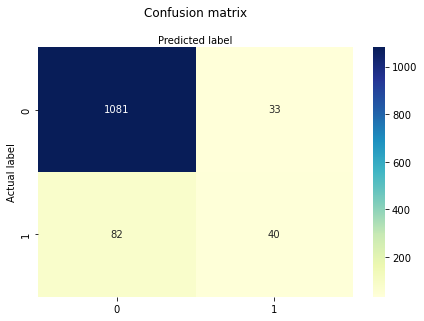

In [14]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Pada gambar ini, warna berbeda mewakili angka berbeda dan warna serupa mewakili angka serupa. Heatmaps adalah cara yang bagus untuk merepresentasikan matriks.

Kita bisa mendapatkan laporan yang lebih komprehensif tentang klasifikasi dengan classification_report():

In [15]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1114
           1       0.55      0.33      0.41       122

    accuracy                           0.91      1236
   macro avg       0.74      0.65      0.68      1236
weighted avg       0.89      0.91      0.90      1236



In [16]:
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))
print("Precision:",metrics.precision_score(Y_test, Y_pred))
print("Recall:",metrics.recall_score(Y_test, Y_pred))

Accuracy: 0.906957928802589
Precision: 0.547945205479452
Recall: 0.32786885245901637


Diketahui bahwa hasil output di atas menghasilkan keakuratan 90.6%, dengan precision 54.7% dan recall 32.7% yang kurang baik

In [17]:
f1_score(Y_test, Y_pred)

0.4102564102564103

Untuk nilai f1 score di atas sebesar 41.02%

### K-Nearest Neighbors
Akan direname terlebih dahulu kolom y menjadi deposit untuk menghindari error

In [18]:
df1 = df.rename(columns={'y': 'deposit'}) 

In [19]:
df1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'deposit', 'yes?'],
      dtype='object')

Dalam sel kode ini kita juga akan mengkodekan kolom label kita dengan mengganti 'ya' dan 'tidak' dengan masing-masing 1 dan 0. 

In [20]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)
kol_cat = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month','day_of_week', 'poutcome']

Melakukan pra-proses data kategoris , dari kata ke angka menggunakan OneHotEncoder() pada sklearn. Pada dasarnya itu akan mengubah kolom kategoris.

In [21]:
# process encode categorical data 
df_encode = pd.DataFrame(encoder.fit_transform(df1[kol_cat]))
##print(df_encode)
df_encode.columns = encoder.get_feature_names(kol_cat)
print(df_encode.columns)

Index(['job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_Basic', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',
       'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'poutcome_failure', 'poutcome_nonexistent',
       'poutcome_succe

Akan dihapus kolom-kolom yang tidak dibutuhkan untuk pengerjaan KNN Neighbour

In [22]:
df1 = df1.drop(kol_cat ,axis=1)

Digunakn concatenate atau dengan pd.concat untuk menggabungkan antar objek pandas

In [23]:
df2 = pd.concat([df_encode, df1], axis=1)
df2

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit,yes?
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2,999,0,-1.8,92.893,-46.2,1.313,5099.1,no,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,4,999,0,1.1,93.994,-36.4,4.855,5191.0,no,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1,999,0,1.4,94.465,-41.8,4.962,5228.1,no,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,3,999,0,1.4,94.465,-41.8,4.959,5228.1,no,0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,999,0,-0.1,93.200,-42.0,4.191,5195.8,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,999,0,1.4,93.918,-42.7,4.958,5228.1,no,0
4115,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,999,0,1.4,93.918,-42.7,4.959,5228.1,no,0
4116,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,2,999,1,-1.8,92.893,-46.2,1.354,5099.1,no,0
4117,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,999,0,1.4,93.444,-36.1,4.966,5228.1,no,0


Kita dapat melakukan encode nilai target dengan menerapkan fungsi lambda/in-line sederhana pada kolom. 

In [24]:
# Encode target value
df2['deposit'] = df2['deposit'].apply(lambda x: 1 if x == 'yes' else 0)

print(df2.shape)
df2.head()

(4119, 63)


,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit,yes?
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2,999,0,-1.8,92.893,-46.2,1.313,5099.1,0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,4,999,0,1.1,93.994,-36.4,4.855,5191.0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1,999,0,1.4,94.465,-41.8,4.962,5228.1,0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,3,999,0,1.4,94.465,-41.8,4.959,5228.1,0,0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,999,0,-0.1,93.200,-42.0,4.191,5195.8,0,0


didefinisikan nilai feature dan target seperti di bawah ini

In [25]:
feature = df2.drop('deposit', axis=1)

In [26]:
target = df2['deposit']

Akan dipisahkan dataset untuk data training dan dataset

In [27]:
# Set Training and Testing Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature , target, 
                                                    shuffle = True, 
                                                    test_size=0.2, 
                                                    random_state=1)


print('Shape training feature:', X_train.shape)
print('Shape testing feature:', X_test.shape)
print('Shape training label:', y_train.shape)
print('Shape training label:', y_test.shape)

Shape training feature: (3295, 62)
Shape testing feature: (824, 62)
Shape training label: (3295,)
Shape training label: (824,)


Akan diimport knearest neigbors classifier model, lalu dilanjut dengan membuat KNN Classifier dengan n = 3, train model dengan menggunakan training set lalu memprediksi respon dari dataset yang diuji

In [28]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

Metrics akan diimport terlebih dahulu dari sklearn sebelum menentukan keakuratan dari KNN Neigbors

In [29]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9101941747572816


Di atas untuk akurasi metrics KNN Neigbours sebesar 92%
Dengan cara yang sama, akan dicoba untuk n_neigbours = 7

In [30]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

In [31]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9186893203883495


Ternyata, keakuratannya berkurang apabila n-nya naik menjadi 7
Untuk mengetahui error yang ada pada KNN Neigbours, dapat dilakukan dengan mendefinisikan eror speerti di bawah ini

In [32]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

min(error)
print('Error terkecil yang didapatkan sebesar: ',min(error))

Error terkecil yang didapatkan sebesar:  0.07645631067961164


Lalu divisualisasikan dengan menggunakan grafik

Text(0, 0.5, 'Error mean')

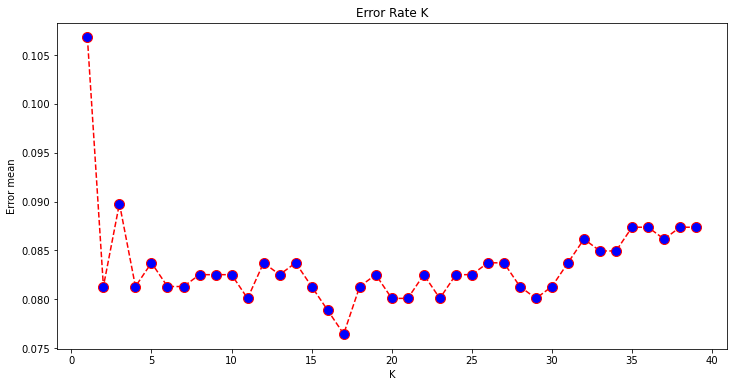

In [33]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K')  
plt.xlabel('K')  
plt.ylabel('Error mean')

In [34]:
#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=i)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.912621359223301


Didapati bahwa keakuratannya apabila n_neighbors = i, maka akurasinya sebesar 91,7%

### Support Vector Machine
Diimport library SVM yang dibutuhkan

In [35]:
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split as tts
from sklearn import svm
from sklearn import metrics

Didefinisikan terlebih dahulu X dan Y sebelum diolah untuk SVM

Akan dipisahkan dataset untuk data training dan dataset

In [57]:
X_train, X_test, Y_train, Y_test = train_test_split(feature, target, test_size = 0.20)

Mari kita perkirakan seberapa akurat pengklasifikasi atau model dapat memprediksi kira kira apakah deposit tersebut.

Akurasi dapat dihitung dengan membandingkan nilai set test aktual dan nilai prediksi.

In [58]:
#Import svm model
from sklearn import svm 

#Create a svm Classifier
df4 = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
df4.fit(X_train, Y_train) 

#Predict the response for test dataset
y_pred = df4.predict(X_test)

Untuk mengetahui classification report dapat menggunakan confusion_matrix() dan classification report()

In [60]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       728
           1       1.00      1.00      1.00        96

    accuracy                           1.00       824
   macro avg       1.00      1.00      1.00       824
weighted avg       1.00      1.00      1.00       824



In [125]:
print("Accuracy:", metrics.accuracy_score(Y_test, y_pred))

Accuracy: 1.0


Diperoleh keakuratannya seperti pada output di atas

In [126]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:", metrics.precision_score(Y_test, y_pred)) 

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:", metrics.recall_score(Y_test, y_pred))

Precision: 1.0
Recall: 1.0


Diperoleh precision dan recall seperti pada output di atas

In [ ]:
X_train, X_test, y_train, y_test = tts(cancer.data, cancer.target, test_size=25/100,random_state=109)

### Decision Tree

Diimport data yang dibutuhkan untuk decision tree

In [37]:
from sklearn import tree

In [38]:
from sklearn.tree import DecisionTreeClassifier

Akan didefinisikan terlebih dahulu X dan Y

In [36]:
X = df[['duration', 'campaign', 'pdays', 'previous']]
Y = df['yes?']

Akan dipisahkan data untuk train data dan dataset

In [39]:
# Split dataset into training set and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1) # 70% training and 30% test

Dibuat objek decision tree classifier, train, kemudian diprediksi respon dari dataset yang diuji

In [40]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,Y_train)

#Predict the response for test dataset
Y_pred = clf.predict(X_test)

Diketahui bawha keakuratannya sebesar 88%

In [41]:
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))

Accuracy: 0.889967637540453


## Random Forest

Diimport library yang dibutuhkan untuk random forest, lalu dibuat gaussian classifier, train, kemudian diprediksi dengan menggunakan .predict()

In [42]:
from sklearn.ensemble import RandomForestClassifier

X = df[['duration', 'campaign', 'pdays', 'previous']]
Y = df['yes?']

# Create a Gaussian Classifier
clf1 = RandomForestClassifier(n_estimators=100)

#Train the model using the trainging sets y_pred=clf.predict(X_test)
clf1.fit(X_train, Y_train)

Y_pred=clf1.predict(X_test)

untuk model accuracy, seberapa sering classifier benar?

In [43]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))

Accuracy: 0.8972491909385113


Untuk feature importants akan didefiniskan seperti di bawwh ini, digunakan untuk melihat variabel manakah yang paling rendah dari yang lain.

In [61]:
import pandas as pd
feature_imp = pd.Series(clf1.feature_importances_,index=num_cols).sort_values(ascending=False)
feature_imp

age         0.744743
pdays       0.124725
campaign    0.080729
previous    0.049803
dtype: float64

Untuk memvisualisasikan feature importants dengan bar plot seperti di bawah ini

No handles with labels found to put in legend.


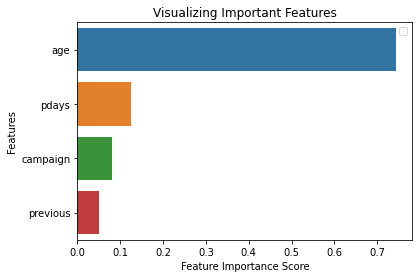

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

## Naive Bayes

Diimport library yang dibutuhkan untuk Naive Bayes, kemudian membuat sebuah gaussian classifier, train, lalu memprediksi respon dari data yang diuji

In [44]:
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, Y_train)

#Predict the response for test dataset
Y_pred = gnb.predict(X_test)

In [45]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.912621359223301


Diperoleh keakuratan sebesar 91.2%

## Confusion Matrix for Random Forest Algorithm 

Didefinisikan terelebih dahulu x dna y yang diperlukan untuk confusion matrix untuk random forest algorithm

In [50]:
x = df_bank[['duration', 'campaign', 'pdays', 'previous']]
y = df_bank['deposit']

In [59]:
X = pd.get_dummies(x)
Y = df_bank['deposit']

In [64]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
rf=RandomForestClassifier()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
X_Train, X_Cv, Y_Train, Y_Cv = train_test_split(X, Y, test_size=0.2)
rf.fit(x_train,y_train)
rf.fit(X_Train,Y_Train)

RandomForestClassifier()

In [65]:
pred_cv1 = rf.predict(x_test)
pred_cv2 = rf.predict(X_Cv)

In [68]:
print(accuracy_score(y_test, pred_cv1))
matrix=confusion_matrix(Y_Cv, pred_cv2)
print(matrix)

0.9587378640776699
[[703  39]
 [ 49  33]]


Diperoleh nilai akuratnya sebesar 95% dan matriks confusion seperti di atas

Menggunakan random forest karena algoritma Random Forest mampu mengklasifiksi data yang memiliki atribut yang tidak lengkap, dapat digunakan untuk klasifikasi dan regresi akan tetapi tidak terlalu bagus untuk regresi, lebih cocok untuk pengklasifikasian data serta dapat digunakan untuk menangani data sampel yang banyak.

### Visualizing Data Grafik Bar

Dengan menggunakan seaborn, akan dibuat grafik bar dari kolom y untuk deposit

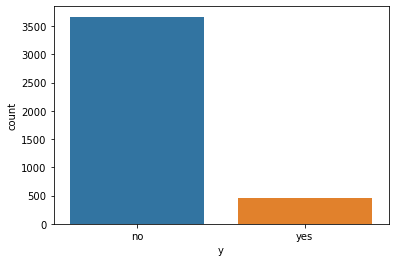

In [74]:
sns.countplot(x = 'y', data=df)
plt.show()

Grafik di atas menunjukkan bahwa dari data yang diambil, jumlah orang yang tidak ingin mengambil deposit dibanding orang yang mengambil deposit sangat besar perbandingannya

Akan dikelompokkan data menurut kolom y

In [75]:
df_group = df.groupby('y').mean()
df_group

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,yes?
y,,,,,,,,,,,
no,39.895311,219.40976,2.605780,982.763086,0.141767,0.240185,93.599677,-40.586723,3.802826,5175.502072,0.0
yes,41.889135,560.78714,1.980044,778.722838,0.585366,-1.177384,93.417268,-39.786475,2.145448,5093.118625,1.0


Dari data di atas, terlihat bahwa rata-rata umur yang tidak ingin mengambil deposit adalah 39-40 tahun.
Sedangkan rata-rata umur yang mengambil deposit adalah 41-42 tahun.

Akan dibuat sebuah grafik histogram berdasarkan jenis pekerjaan dan rata-rata umur. Langkah pertama adalah mengelompokkan data tersebut dengan .groupby('job')

In [84]:
df_group2 = df.groupby('job').mean()
df_group3 = df_group2.drop(['duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'yes?'], axis = 1)
df_group3

,age
job,
admin.,38.240119
blue-collar,39.265837
entrepreneur,42.202703
housemaid,45.672727
management,42.429012
retired,60.873494
self-employed,40.679245
services,38.513995
student,26.695122


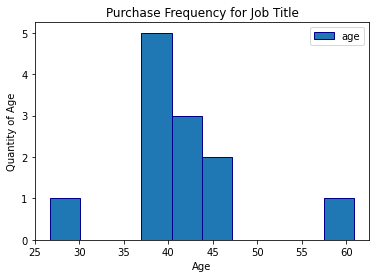

In [86]:
%matplotlib inline
df_group3.plot(kind='hist', edgecolor='darkblue')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Age')
plt.ylabel('Quantity of Age')
plt.show()

Dari data di atas, terlihat bahwa umur yang muncul untuk jenis pekerjaan yang tersedia pada data adalah:
Umur 27 - 30 = 1 jenis pekerjaan
Umur 37 - 41 = 5 jenis pekerjaan
Umur 41 - 44 = 3 jenis pekerjaan
Umur 44 - 47 = 2 jenis pekerjaan
Umur 57 - 60 = 1 jenis pekerjaan